## The Sparks Foundation - GRIP - Data Science and Business Analytics Intern - JULY2021
## Task 6 - Prediction using DecisionTreeML
### Author : Chandra Sekar. A

#### Dataset used: Iris dataset available in sklearn or download from this link - https://bit.ly/3kXTdox
#### Probelm Statement: 
Predict the type of flower using DecisionTree algorithm and represent it visually

In [1]:
# Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Checking for duplicates
df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [5]:
# Number of classes and its counts
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

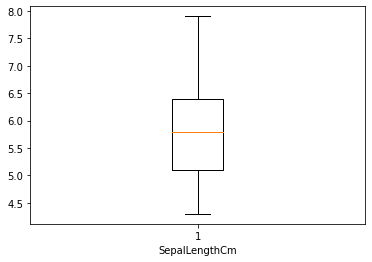

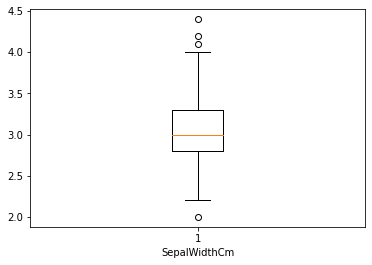

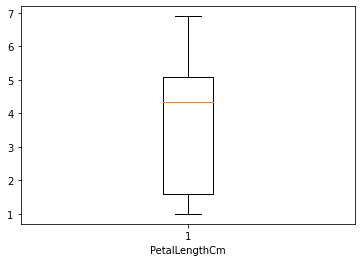

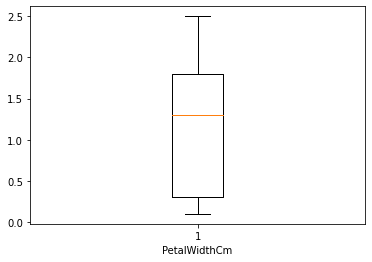

In [6]:
# Check for outliers
for i in df.columns:
    if df[i].dtype == 'float64':
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [7]:
# Using Label encoder for converting categorical data to numeriical data
from sklearn.preprocessing import LabelEncoder
df['Species']=LabelEncoder().fit_transform(df['Species'])

In [8]:
# Splitting the data to independent and dependent variables
X = df.iloc[:, 1:5] # Independent
y = df['Species'] # target

In [9]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

# Model Building

In [11]:
# Doing train test split for the model training and testing purpouse
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [12]:
# Decision Tree classifier Algorithm is used
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")


# Training the train data
tree.fit(x_train, y_train)


# Checking the scores of the train set and test set data
tree_score_train = tree.score(x_train, y_train)
print("Training score: ",tree_score_train)
tree_score_test = tree.score(x_test, y_test)
print("Testing score: ",tree_score_test)


# Predicting the values using test dataset
predict_DT = tree.predict(x_test)


# Checking for the recall score - Recall->how many times 1 is predicted correctly as 1
print('Recall Score of Decision Tree Classifier is: ', metrics.recall_score(y_test, predict_DT, average = None))

Training score:  1.0
Testing score:  0.9666666666666667
Recall Score of Decision Tree Classifier is:  [1.    1.    0.875]


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_DT)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


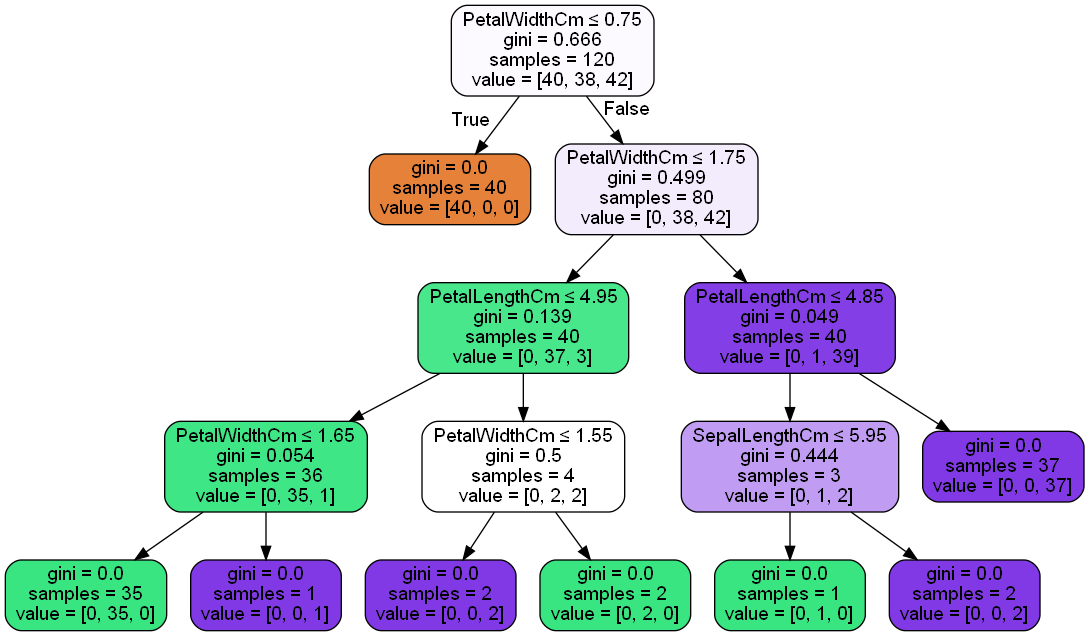

In [14]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())